### THE BUSINESS QUESTION THIS PROJECT INTENDS TO ANSWER: Given a Bank customer, can we build a classifier which can determine whether they will leave in the next 6 months or not?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Display a subset of the dataset
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9406,9407,15743760,Davidson,850,France,Male,31,6,131996.66,2,1,1,178747.43,0
1758,1759,15645544,Nekrasov,642,Germany,Female,30,5,129753.69,1,1,0,582.53,0
3883,3884,15604355,Shand,519,France,Male,39,1,97700.02,1,1,1,30709.03,0
9575,9576,15604732,Milani,483,France,Female,30,9,0.00,2,0,0,136356.97,0
7736,7737,15685640,Dancy,649,France,Female,41,3,130931.83,1,1,1,144808.37,0


In [4]:
#  Drop columns not important for the analysis
df1 = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [5]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5930,826,France,Female,30,5,0.00,2,0,1,157397.57,0
7106,646,France,Male,40,5,93680.43,2,1,1,179473.26,0
9354,590,France,Male,43,8,0.00,2,1,1,143628.31,0
3702,504,France,Female,73,8,0.00,1,1,1,34595.58,0
8030,592,Spain,Male,38,3,0.00,1,1,1,12905.89,1


In [6]:
#  Display the value types of each columns
df1.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# function that displays the unique values of each column
def print_unique_cols(df1):
    for col in df1:
        print(f'{col} : {df1[col].unique()}')

In [8]:
print_unique_cols(df1)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [9]:
# Display the number of null rolls each columns has
df1.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Display the number of empty string rolls each column has
df1.eq(' ').sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Display the shape of the dataset
df1.shape

(10000, 11)

In [12]:
df1['Age'].iloc[6697]

41

In [13]:
# Replace the gender column with 0 and 1
df1['Gender'] = df1['Gender'].replace({'Female':1,'Male':0})

In [14]:
df1.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4334,705,Spain,1,57,3,0.0,2,1,1,34134.14,0
1721,585,France,1,39,7,0.0,2,1,0,2401.26,0


In [15]:
# Check the value_counts of our target column
df1['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
7963/10000

0.7963

In [17]:
2037/10000

0.2037

### As shown in the value count, our dataset is imbalanced but we wont try to fix it now

In [18]:
df1.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
931,564,Germany,0,41,9,103522.75,2,1,1,34338.21,0
325,716,France,0,35,4,144428.87,1,1,0,134132.65,0


In [19]:
df2 = pd.get_dummies(data=df1,columns=['Geography'])

In [20]:
df2.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5895,738,0,37,7,140950.92,2,1,0,195333.98,0,0,1,0
1788,439,1,43,8,0.00,1,0,1,104889.30,0,1,0,0
5966,508,1,43,9,0.00,1,1,0,103726.71,0,1,0,0
8983,723,0,37,3,94661.53,2,1,0,121239.65,0,0,1,0
923,572,1,19,1,138657.08,1,1,1,16161.82,0,0,1,0


In [21]:
df2.shape

(10000, 13)

In [22]:
df1.shape

(10000, 11)

In [23]:
import matplotlib.pyplot as plt

#### Data Visualization

In [24]:
def visualize(df2,column):
    existed_no = df2[df2['Exited'] == 0][column]
    existed_yes = df2[df2['Exited'] == 1][column]
    plt.xlabel(column)
    plt.ylabel('Number of customers')
    plt.title('Churn prediction')
    plt.hist([existed_yes,existed_no],rwidth=0.95,color=['red','blue'],label=['Exited=Yes','Exited=No'])
    plt.legend()

In [25]:
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

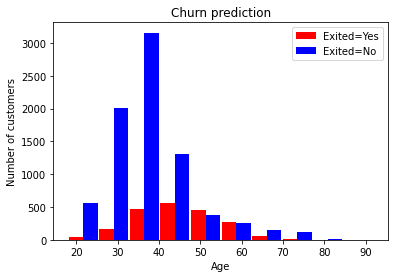

In [26]:
visualize(df2,'Age')

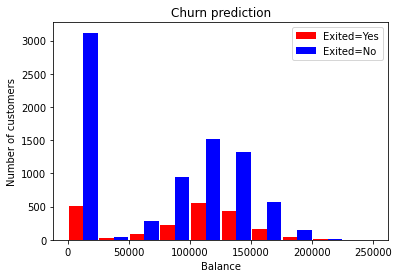

In [27]:
visualize(df2,'Balance')

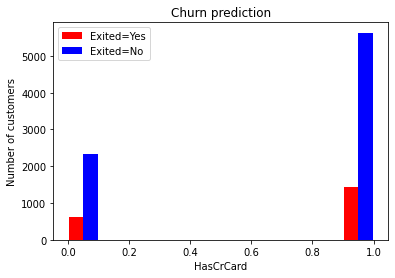

In [28]:
visualize(df2,'HasCrCard')

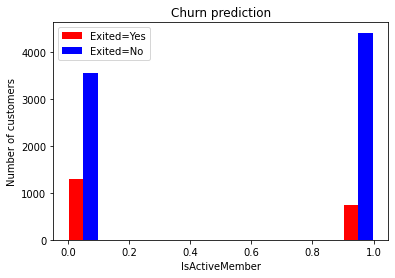

In [29]:
visualize(df2,'IsActiveMember')

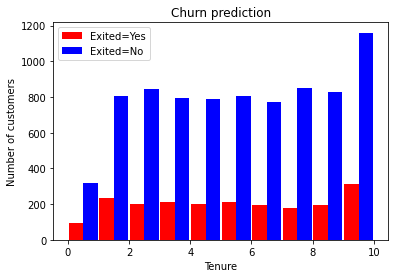

In [30]:
visualize(df2,'Tenure')

In [31]:
print_unique_cols(df2)

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

### Let's Now Scale our dataset

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [35]:
print_unique_cols(df2)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [36]:
#  Create X and y dataFrame

X = df2.drop('Exited',axis='columns')
y = df2['Exited']

In [37]:
#  Splt the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [38]:
len(X_train)

8000

In [39]:
len(X_test)

2000

In [40]:
X_train.shape[1]

12

### Let's build and train our model

In [41]:
from tensorflow import keras

In [42]:
model1 = keras.Sequential([
    keras.layers.Dense(10,input_shape=(X_train.shape[1],),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),  
])

In [43]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 4s 2ms/step - loss: 0.5925 - accuracy: 0.7074
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4852 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8036
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8102
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8142
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8130
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8138
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.8117
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4285 - accuracy: 0.8135
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4256 - accura

Epoch 81/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8637
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8640
Epoch 83/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.8641
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8646
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8650
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3345 - accuracy: 0.8622
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8649
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8645
Epoch 89/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8660
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3335

In [45]:
model1.evaluate(X_test,y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8530


[0.34914302825927734, 0.8529999852180481]

In [46]:
y_predicted = model1.predict(X_test)

In [47]:
y_predicted

array([[0.02533206],
       [0.04825118],
       [0.06871414],
       ...,
       [0.01468486],
       [0.01320007],
       [0.05553874]], dtype=float32)

In [48]:
y_pred_list=[]
for element in y_predicted:
    if element >0.5:
        y_pred_list.append(1)
    else:
        y_pred_list.append(0)

In [49]:
y_pred_list[:5]

[0, 0, 0, 0, 0]

In [50]:
y_test[:5]

7054    0
442     0
3954    0
2288    0
3196    0
Name: Exited, dtype: int64

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,y_pred_list))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



In [61]:
df2['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [62]:
df2.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
8295,0.744,0,0.297297,0.6,0.0,0.333333,1,1,0.559461,0,1,0,0
2671,0.898,0,0.229730,0.7,0.0,0.333333,0,1,0.703913,0,0,0,1


### As we can see above, the dataset is inbalanced

In [65]:
from imblearn.over_sampling import SMOTE

In [68]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

In [70]:
y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train_sm,X_test_sm,y_train_sm,y_test_sm = train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [76]:
y_train.value_counts()

0    6368
1    1632
Name: Exited, dtype: int64

In [77]:
y_train_sm.value_counts()

0    6370
1    6370
Name: Exited, dtype: int64

In [80]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(10,input_shape=(X_train_sm.shape[1],),activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ]
)

model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model2.fit(X_train_sm,y_train_sm,epochs=100)

Epoch 1/100
399/399 [==============================] - 3s 3ms/step - loss: 0.6567 - accuracy: 0.6166
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.6898
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7208
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5290 - accuracy: 0.7403
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5139 - accuracy: 0.7534
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.7573
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4940 - accuracy: 0.7630
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4883 - accuracy: 0.7639
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.7665
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4810 - accura

399/399 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7872
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.7882
Epoch 83/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4408 - accuracy: 0.7896
Epoch 84/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4405 - accuracy: 0.7874
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4411 - accuracy: 0.7863
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.7892
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.7885
Epoch 88/100
399/399 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.78 - 1s 2ms/step - loss: 0.4395 - accuracy: 0.7892
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.7871
Epoch 90/100
399/399 [==============================]

In [81]:
model2.evaluate(X_test_sm,y_test_sm)

100/100 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.7863


[0.4400363564491272, 0.7862523794174194]

In [89]:
prediction_sm = model2.predict(X_test_sm)

In [90]:
y_pred_sm= []

for pred_sm in prediction_sm:
    if pred_sm >0.5:
        y_pred_sm.append(1)
    else:
        y_pred_sm.append(0)

In [91]:
y_test_sm[:4]

1327     0
121      0
6011     1
12164    1
Name: Exited, dtype: int64

In [92]:
y_pred_sm[:4]

[0, 1, 1, 1]

In [93]:
print(classification_report(y_test_sm,y_pred_sm))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1593
           1       0.81      0.75      0.78      1593

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



### save the model

In [115]:
model2.save('churn_model2.h5')

### load model

In [96]:
from tensorflow.keras.models import load_model

In [116]:
saved_model = load_model('churn_model2.h5')

In [117]:
saved_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [118]:
saved_model.evaluate(X_test_sm,y_test_sm)

100/100 [==============================] - 1s 1ms/step - loss: 0.4400 - accuracy: 0.7863


[0.4400363564491272, 0.7862523794174194]